In [2]:
# Import necessary libraries
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For plotting visualizations
import seaborn as sns  # For advanced visualizations like heatmaps
from sklearn.model_selection import train_test_split  # For splitting the dataset into train and test
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.ensemble import AdaBoostClassifier  # For AdaBoost implementation
from sklearn.tree import DecisionTreeClassifier  # For decision tree as a weak learner
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score  # For model evaluation metrics
from sklearn.datasets import load_breast_cancer  # For loading the Breast Cancer dataset


In [3]:
# Load the Breast Cancer Wisconsin dataset
data = load_breast_cancer()

# Convert the dataset into a DataFrame for easier manipulation
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target  # Add the target variable to the DataFrame


In [4]:
# Split the dataset into features (X) and target (y)
X = df.drop('target', axis=1)  # Features (all columns except 'target')
y = df['target']  # Target variable ('target' column)


In [5]:
# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Standardize the features (optional for AdaBoost but often recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit and transform the training data
X_test = scaler.transform(X_test)  # Transform the test data (using the same scaler)


In [7]:
# Create the base learner (decision tree stump)
base_learner = DecisionTreeClassifier(max_depth=1)  # A shallow decision tree with max depth of 1 (weak learner)


In [8]:
# Initialize the AdaBoost classifier using the 'SAMME' algorithm (to avoid deprecation warning)
ada_boost = AdaBoostClassifier(base_learner, n_estimators=50, learning_rate=1.0, algorithm='SAMME', random_state=42)


In [9]:
# Fit the AdaBoost model on the training data
ada_boost.fit(X_train, y_train)


AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [10]:
# Predict on the test data
y_pred = ada_boost.predict(X_test)
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
# Generate the classification report (precision, recall, F1-score, and support)
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)
# Generate the confusion matrix to evaluate true positives, true negatives, false positives, and false negatives
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy: 0.9649

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


Confusion Matrix:
[[40  3]
 [ 1 70]]


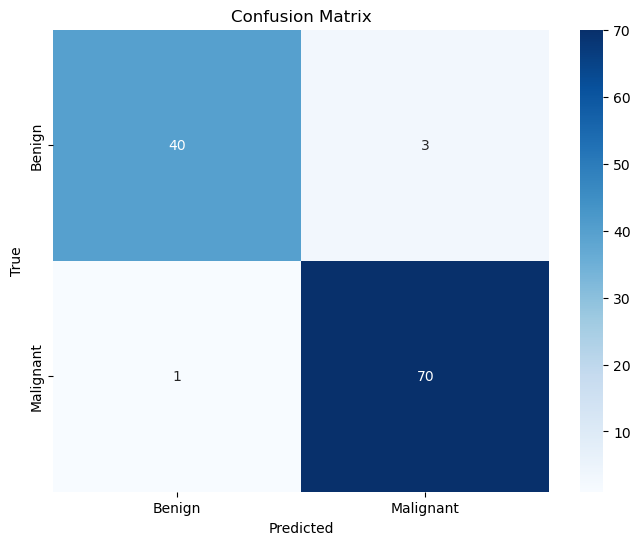

In [11]:
# Plotting the confusion matrix heatmap for easy visualization of classification results
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


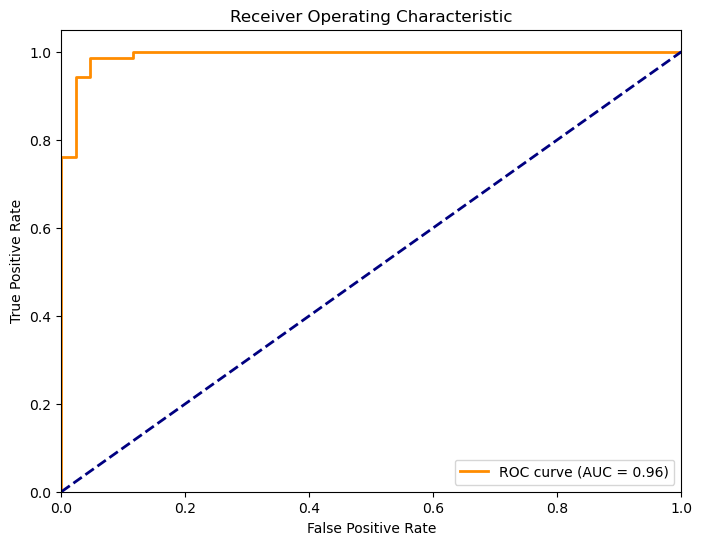

In [12]:
# Generate the ROC curve (Receiver Operating Characteristic) and calculate the AUC score
fpr, tpr, thresholds = roc_curve(y_test, ada_boost.predict_proba(X_test)[:, 1])
roc_auc = roc_auc_score(y_test, y_pred)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


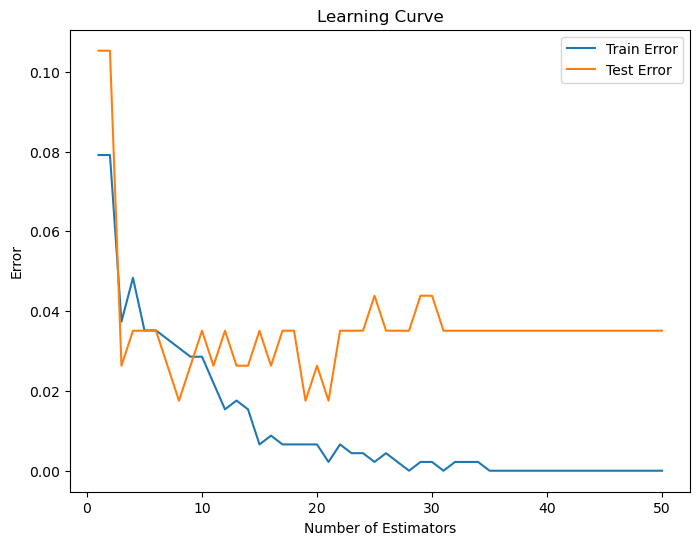

In [13]:
# Plotting the learning curve to see the performance change with the number of weak learners
train_errors, test_errors = [], []
for m in range(1, 51):
    model = AdaBoostClassifier(base_learner, n_estimators=m, learning_rate=1.0, algorithm='SAMME', random_state=42)
    model.fit(X_train, y_train)
    train_errors.append(1 - model.score(X_train, y_train))
    test_errors.append(1 - model.score(X_test, y_test))

plt.figure(figsize=(8, 6))
plt.plot(range(1, 51), train_errors, label="Train Error")
plt.plot(range(1, 51), test_errors, label="Test Error")
plt.xlabel('Number of Estimators')
plt.ylabel('Error')
plt.title('Learning Curve')
plt.legend()
plt.show()
